<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## Problema 1-4: Implementación ScratchLogisticRegressios

- problema 1: Hypotetical function
- problema 2: Steepest descent
- problema 3: Estimated (predict y predict_proba)
- problema 4: Objetive function (loss function)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
class ScratchLogisticRegression():

    def __init__(self, num_iter=1000, lr=0.01, reg=1, no_bias=False, verbose=False):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        self.reg = reg
        # Prepare an array to record to loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        n_samples, n_features = X.shape

        if not self.no_bias:
            # Append bias column to X
            X = np.hstack([np.ones([n_samples, 1]), X])

        # Prepare theta for hypothesis function
        self.theta = np.random.rand(n_features + (1 - self.no_bias))

        for i in range(self.iter):
            y_hyp = self._hypothetical_function(X)
            self.theta = self._gradient_descent(X, y, y_hyp)
            self.loss[i] = self._loss_function(y_hyp, y)

            if X_val is not None and y_val is not None:
                y_predict = self.predict_proba(X_val, False)
                self.val_loss[i] = self._loss_function(y_predict, y_val)

        if self.verbose:
            # Output learning process when  verbose is set to True
            print(f'Loss: {self.loss}')
            print(f'Val_loss: {self.val_loss}')
        # save theta
        np.save("theta", self.theta)

    def predict(self, X):
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        y_pred = self._hypothetical_function(X)
        return np.round(y_pred).astype('int64')

    def predict_proba(self, X, displayMode=True):
        if not self.no_bias:
            n_samples = X.shape[0]
            X = np.hstack([np.ones([n_samples, 1]), X])
        y_pred = self._hypothetical_function(X)
        return np.hstack([(1-y_pred).reshape(-1, 1), y_pred.reshape(-1, 1)]) if displayMode else y_pred

    def _hypothetical_function(self, X):
        y_hyp = 1 / (1 + np.exp(-np.dot(X, self.theta.T)))
        return y_hyp

    def _gradient_descent(self, X, y, y_hyp):
        n_samples, n_features = X.shape
        if not self.no_bias:
            update_theta = np.zeros([n_features])
            update_theta[0] = self.theta[0] - np.dot((y_hyp - y), X[:, 0]) / n_samples
            update_theta[1:] = self.theta[1:] - (np.dot((y_hyp -y), X[:, 1:]) + self.reg * self.theta[1:]) / n_samples
            return update_theta
        else:
            update_theta = self.theta - - np.dot((y_hyp - y), X) + self.reg * self.theta
            return update_theta

    def _loss_function(self, y_pred, y):
        n_samples = y.shape[0]

        # Compute log-loss (cross-entropy)
        log_loss = np.mean((-y * np.log(y_pred)) - (1 - y) * np.log(1 - y_pred))

        # Add L2 regularization (exclude bias term from regularization)
        if not self. no_bias:
            theta_reg = self.theta[1:] # Exclude bias from regularization
        else:
            theta_reg = self.theta

        reg_term = self.reg * np.sum(theta_reg ** 2) / (2 * n_samples)

        return log_loss + reg_term


In [3]:
def scratch_train_test_split(X, y, train_size=0.8):
    if train_size <= 0 or train_size >= 1:
        raise ValueError(f'train_size={train_size} should be a float in the (0, 1) range')


    train_size = int(train_size * X.shape[0])
    idx = np.arange(X.shape[0])
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]
    split = np.split(X, [train_size])
    X_train = split[0]
    X_test = split[1]
    split = np.split(y, [train_size])
    y_train = split[0]
    y_test = split[1]
    return X_train, X_test, y_train, y_test

In [4]:
import warnings
warnings.filterwarnings('ignore')

X = np.array([
    [1, 2],
    [1, 2.2],
    [0.9, 2.5],
    [5, 8],
    [0.6, 1.8],
    [5, 8],
    [6, 8],
    [5.2, 8.2]
])
X.shape

(8, 2)

In [5]:
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])
y.shape

(8,)

In [6]:
slr = ScratchLogisticRegression(verbose=True)

slr.fit(X, y)

Loss: [1.21966345 2.7899604         nan 2.58281124 0.78081332 1.87397083
 4.02060872 1.73521454 0.32670519 0.76924507 1.69027415 0.30002666
 0.33747948 0.45979411 0.21301853 0.19974935 0.25219873 0.27156537
 0.18611393 0.1643302  0.20621741 0.19239164 0.17026619 0.1444047
 0.17803207 0.15213283 0.15955532 0.13098783 0.15910145 0.12915314
 0.1501543  0.11999543 0.14627614 0.11565973 0.14119576 0.11086041
 0.13713046 0.10715615 0.13333067 0.10396724 0.12988461 0.10128408
 0.12672319 0.09901703 0.12380863 0.09710388 0.12110874 0.09549369
 0.11859686 0.09414481 0.11625091 0.09302288 0.11405252 0.09209927
 0.11198648 0.09134983 0.11004035 0.09075389 0.10820406 0.09029341
 0.10646977 0.08995227 0.10483163 0.08971562 0.10328559 0.08956937
 0.10182931 0.08949975 0.10046185 0.08949294 0.09918341 0.08953499
 0.09799497 0.08961181 0.09689779 0.08970946 0.09589287 0.08981464
 0.09498047 0.08991532 0.09415964 0.09000137 0.09342787 0.09006514
 0.09278105 0.09010177 0.09221356 0.09010915 0.09171853 0

In [7]:
slr.predict(X)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [8]:
slr.predict_proba(X)

array([[0.96969169, 0.03030831],
       [0.9649677 , 0.0350323 ],
       [0.95876562, 0.04123438],
       [0.03796692, 0.96203308],
       [0.97887364, 0.02112636],
       [0.03796692, 0.96203308],
       [0.02223036, 0.97776964],
       [0.02953034, 0.97046966]])

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
lr_predict = lr.predict(X)
display(lr_predict)

array([0, 0, 0, 1, 0, 1, 1, 1])

In [10]:
lr_predict_proba = lr.predict_proba(X)
display(lr_predict_proba)

array([[0.96969548, 0.03030452],
       [0.96497205, 0.03502795],
       [0.95877089, 0.04122911],
       [0.03796425, 0.96203575],
       [0.97887672, 0.02112328],
       [0.03796425, 0.96203575],
       [0.02222769, 0.97777231],
       [0.02952795, 0.97047205]])

## Problema 5: Aprendizaje y estimación

In [11]:
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('species')])
df = pd.concat([X, y], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df = df[['sepal_length', 'petal_length', 'species']][df['species'] != 0]
df

,sepal_length,petal_length,species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [13]:
X = df[['sepal_length', 'petal_length']].values
y = df['species'].values

In [14]:
# Encode the Species value from (1,2) to (0,1)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
X_train, X_test, y_train, y_test = scratch_train_test_split(X, y, train_size=0.75)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler   = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print(f"{'Accuracy:':14}{acc_score}")
    print(f"{'Precision:':14}{prec_score}")
    print(f"{'ReCall:':14}{rec_score}")
    print(f"{'F:':14}{f_score}")
    print('Confusion Matrix : \n', conf_matrix)

In [18]:
slr = ScratchLogisticRegression()
slr.fit(X_train_scaled, y_train, X_test_scaled, y_test)
slr_predict = slr.predict(X_test_scaled)

pd.DataFrame([y_test, slr_predict], index=['Actual value', 'predicted value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,0,0,1,1,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,1
predicted value,0,0,1,1,0,0,1,1,1,0,...,0,1,1,1,0,0,0,0,0,1


In [19]:
evaluation(y_test, slr_predict)

Accuracy:     0.92
Precision:    0.8333333333333334
ReCall:       1.0
F:            0.9090909090909091
Confusion Matrix : 
 [[13  2]
 [ 0 10]]


In [20]:
# Scikit-learn Logisttic regression learning

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predict = lr.predict(X_test_scaled)

pd.DataFrame([y_test, lr_predict], index=['Actual value', 'predicted value'])

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Actual value,0,0,1,1,0,0,1,1,0,0,...,0,1,1,1,0,0,0,0,0,1
predicted value,0,0,1,1,0,0,1,1,1,0,...,0,1,1,1,0,0,0,0,0,1


In [21]:
evaluation(y_test, lr_predict)

Accuracy:     0.92
Precision:    0.8333333333333334
ReCall:       1.0
F:            0.9090909090909091
Confusion Matrix : 
 [[13  2]
 [ 0 10]]


## Problema 6: Grafica de la curva de aprendizaje


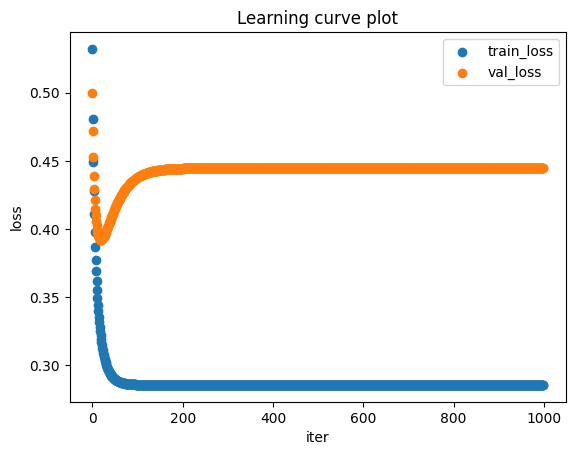

In [22]:
plt.title('Learning curve plot')
plt.xlabel('iter')
plt.ylabel('loss')
plt.scatter(range(slr.iter), slr.loss, label='train_loss')
plt.scatter(range(slr.iter), slr.val_loss, label = 'val_loss')

plt.legend()
plt.show()

## Problema 7: visualización del área de decisión

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title= 'decision region', xlabel='xlabel', ylabel='ylabel', target_name=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    #pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step), np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    #plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)

    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color=scatter_color[i], label=target_name[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_name[i]) for i in range(n_class)]

    plt.legend()
    plt.show()

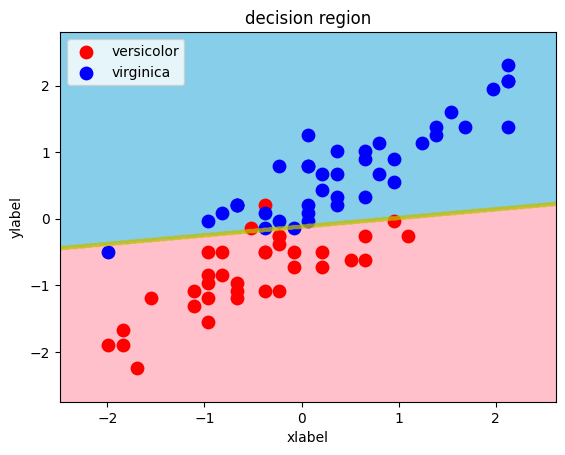

In [24]:
decision_region(X_train_scaled, y_train, lr) #Scratch (c=0.1)

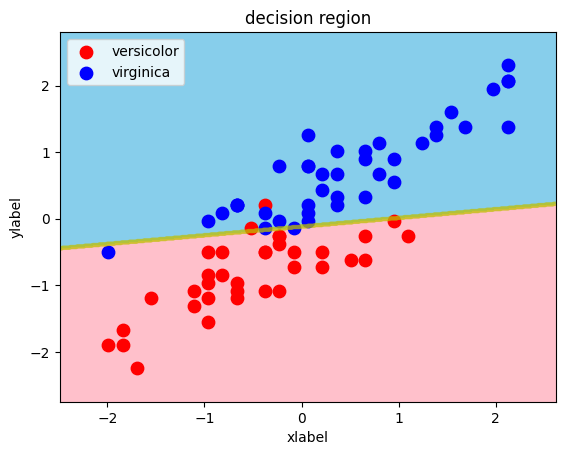

In [25]:
decision_region(X_train_scaled, y_train, slr)

## Problema 8: Saving weights

In [26]:
np.save('theta', slr.theta)

In [27]:
np.load('theta.npy')

array([ 0.37246812, -0.42097444,  3.22465783])